### Logits Regression on MNIST with PyTorch

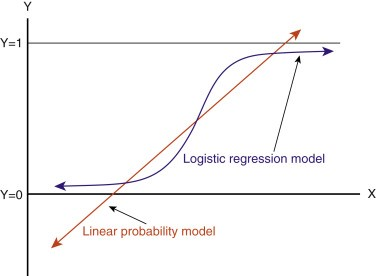

In [3]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [4]:
# cheat sheet or workflow
# Step 1: Load data
# Step 2: Make dataset iterable
# Step 3: Create Model Class
# Step 4: Instantiate Model Class
# Step 5: Instantiate Loss Class
# Step 6: Instantiate Optimizer Class
# Step 7: Train Model

In [6]:
# 1: Load dataset -- via torchvision.datasets
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Processing...
Done!


In [8]:
# 2: Make dataset Iterable
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# 3: Create Model class
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [13]:
# 4: Instantiate Model Class
model = LogisticRegression(input_dim, output_dim)

In [16]:
# 5: Instantiate Loss Class
criterion = torch.nn.CrossEntropyLoss() # calculate softmax and then cross entropy

In [17]:
# 6: Instantiate Optimizer Class
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [19]:
# 7: Train Model
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                
                total += labels.size(0)
                correct += (predicted == labels).sum()
            acc = 100 * correct / total
            print("iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), acc))

iteration: 500. Loss: 1.626664161682129. Accuracy: 75.
iteration: 1000. Loss: 1.2974151372909546. Accuracy: 79.
iteration: 1500. Loss: 1.1116173267364502. Accuracy: 80.
iteration: 2000. Loss: 1.0583362579345703. Accuracy: 81.
iteration: 2500. Loss: 1.002427101135254. Accuracy: 82.
iteration: 3000. Loss: 0.9349787831306458. Accuracy: 83.
